# Spatial Representations and Relationships - Point Features

In [1]:
# Load relevant R packages
inLibraries = list('repr','rgdal','spdep')
for (rpack in inLibraries) {
  if (is.element(rpack,installed.packages()[,1])){           
      #Load the library into R
      suppressMessages(library(rpack,character.only = TRUE))
    }
    else {
        print(paste("Warning:  ",rpack," is not an installed package"))
    }
}
#resize plot area
options(repr.plot.width=6, repr.plot.height=6)

Warning message:
"package 'rgdal' was built under R version 3.4.2"Warning message:
"package 'sp' was built under R version 3.4.2"Warning message:
"package 'spdep' was built under R version 3.4.2"

## Read a Point FeatureClass

Use the readOGR function to access a point .shp file.  Display the points on the screen. The dataset used here (ponds/Ponds.shp) is a set of points representing the locations of small points.

In [2]:
#Read in point featureclass
ppoints <- readOGR("datasets/ponds","Ponds")

OGR data source with driver: ESRI Shapefile 
Source: "datasets/ponds", layer: "Ponds"
with 463 features
It has 1 fields
Integer64 fields read as strings:  ID 


In [3]:
peek <- head(ppoints@data)
peek

ID
1
2
3
4
5
6


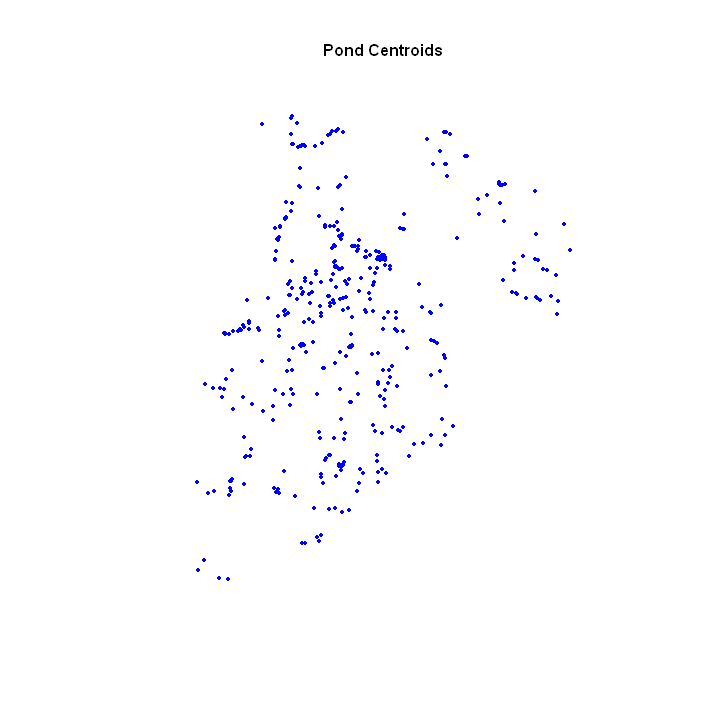

In [4]:
#Add the point features to the display
plot(ppoints, pch=21, bg="blue", col="blue", 
         lwd=.5, cex=.4, main="Pond Centroids", cex.main=.8)

## Representing Spatial Neighborhoods 

Retrieve the x,y coordinates associated with each point feature.  Use the 'dnearneigh' (spdep library) function to create a .nb class object that contains a list of neighbors for each point.  In particular, the dnearneigh() function identifies neighbors as other points that within a stated distance range of a point.  

In this example, the min distance = d1 and the max distance = d2. The distance range is defined as [d1,d2) by the parameter 'bounds'. Interpretation in the nb object is similar to that generated in the polygon practice - i.e. the neighbors of point 6 are points 138, 139, and 154.

In [5]:
#Identify the neighbors of each point
coords = coordinates(ppoints)

d1 = 0
d2 = 1000

In [7]:
tail(ppoints@data)

,ID
458,459
459,460
460,461
461,462
462,463
463,464


In [8]:
head(coords)

coords.x1,coords.x2
570660,4177939
580859,4180380
580747,4180395
580689,4180422
580757,4179577
577624,4174538


In [9]:
dim(coords)

[1] 463   2

In [10]:
ppoints.nb <- dnearneigh(coords, d1, d2, 
                             bounds=c("GE", "LT"))


#examine the nb object
head(ppoints.nb)

[[1]]
 [1]  50  51  52  53  54 104 105 107 294 295 299 425

[[2]]
[1]   3   4   5 118 119 120 121

[[3]]
[1]   2   4   5 118 119 120 121

[[4]]
[1]   2   3   5 118 119 120 121

[[5]]
[1]   2   3   4 118 119 120 121 390

[[6]]
[1] 138 139 154

### Mapping the Neighbors

Represent the neighbors of the points as lines.  This can be done by plotting the coordinates of each point relative to those of its neighbors.

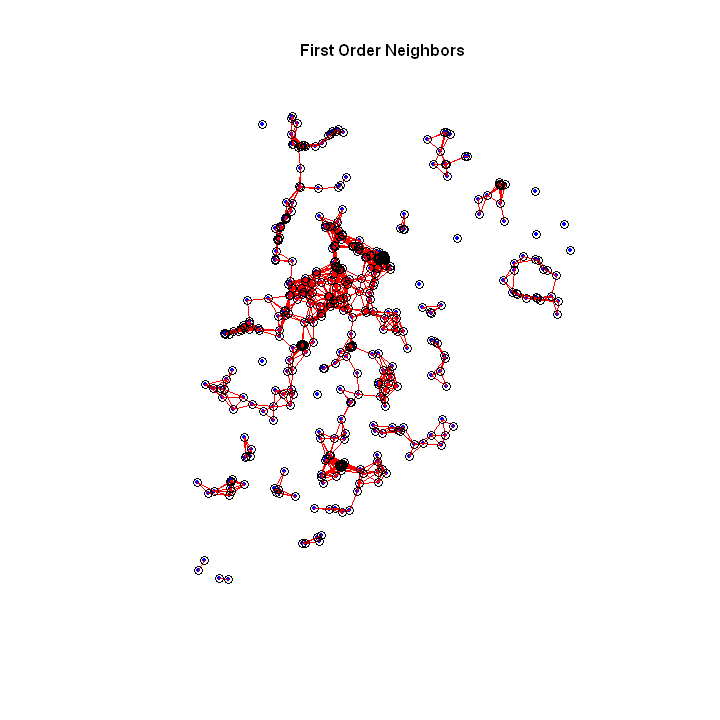

In [12]:
#Map shp file
plot(ppoints, pch = 21, bg="blue", col="blue", lwd=.5, 
             cex = 0.4, main="First Order Neighbors", cex.main=.8)

plot(ppoints.nb, coords, add = TRUE, col="red")

## Higher order neighbors (spatial lags)

While points falling within range [d1,d2) of a point may be considered neighborhoods, what about a point's relationship with non-neighbors?  If a point has no relationship with any other points, then great, we can move on.  However, perhaps a point does have some relationship with other points, albeit a lesser one.  In such cases, we can model secondary, tertiary, etc. neighborhoods.  For example, a second order neighborhood may be defined as those points in range [1000,2000).

In [13]:
#Identify other orders of neighbors of each point
coords = coordinates(ppoints)
d1 = 1000
d2 = 2000

ppoints.snb <- dnearneigh(coords, d1, d2,
                              bounds=c("GE", "LT"))

#evaluate the results
paste('first order neighbors')
head(ppoints.nb)
paste('second order neighbors')
head(ppoints.snb)

[1] "first order neighbors"

[[1]]
 [1]  50  51  52  53  54 104 105 107 294 295 299 425

[[2]]
[1]   3   4   5 118 119 120 121

[[3]]
[1]   2   4   5 118 119 120 121

[[4]]
[1]   2   3   5 118 119 120 121

[[5]]
[1]   2   3   4 118 119 120 121 390

[[6]]
[1] 138 139 154

[1] "second order neighbors"

[[1]]
[1]  48  49 291 298 300 456 457 458 459

[[2]]
[1] 117 348 364 390

[[3]]
[1] 116 117 348 364 390

[[4]]
[1] 115 116 117 348 364 390

[[5]]
[1] 117 348 364

[[6]]
 [1]   7  70 140 141 142 143 144 146 149 150 151 398

### Map Higher Order Neighbors

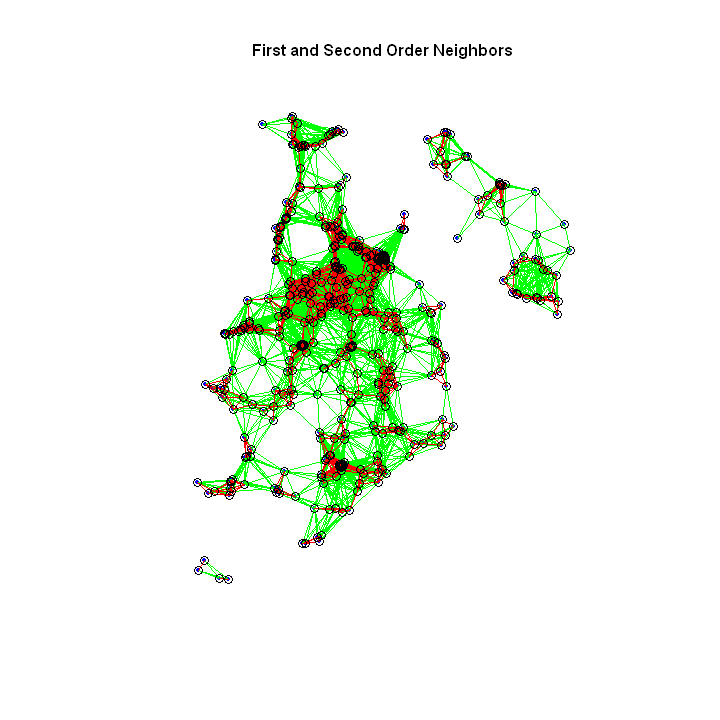

In [14]:
#Display point features
plot(ppoints, pch = 21, bg = "blue", col = "blue", lwd = .5, cex = .4, 
             main="First and Second Order Neighbors", cex.main = .8)

#Display 2nd order neighbors
plot(ppoints.snb, coords, add = TRUE, col="green")

#Display nearest neighbors
plot(ppoints.nb, coords, add = TRUE, col="red")